In [5]:
from src.modelmodule.seg import SegModel
from src.datamodule.seg import SegDataModule
from pytorch_lightning import Trainer, seed_everything
import matplotlib.pyplot as plt
import torch
from omegaconf import OmegaConf, DictConfig
import hydra

# 用于初始化 Hydra 并且合成配置的函数
def init_hydra():
    with hydra.initialize(config_path="run/conf", version_base="1.2"):
        # 这里我们使用 compose 而不是 hydra.main
        cfg = hydra.compose(config_name="train")
        return cfg

# 执行代码
cfg = init_hydra()

cfg.accelerator = 'cpu'
cfg.duration = 1440
cfg.downsample_rate = 1
cfg.batch_size = 3
cfg.sigma = 3
cfg.decoder.dropout=0.2 
cfg.post_process.score_th=0.502 
cfg.post_process.distance=64 
cfg.loss=DictConfig({"name": "MSE"})
# cfg.feature_extractor=DictConfig({
#     "name": "PANNsFeatureExtractor",
#     "base_filters": 64,
#     "kernel_sizes": [
#       32,
#       16,
#       3
#     ],
#     "stride": 3,
#     "sigmoid": True,
#     "reinit": True,
#     "win_length": None
#   })
cfg.model.unet_class="DeepLabV3Plus" 
cfg.model.encoder_name="efficientnet-b2"


# additional_cfg = OmegaConf.load(f"run/conf/feature_extractor/{cfg.feature_extractor}.yaml")
# print(OmegaConf.merge(cfg, additional_cfg))

seed_everything(cfg.seed)
print(cfg)
# 初始化 lightning 数据模块和模型
datamodule = SegDataModule(cfg)
# model = SegModel(
#     cfg, datamodule.valid_event_df, len(cfg.features), len(cfg.labels), cfg.duration
# )
# weight_path = 'output/train/exp005/single/child-mind-institute-detect-sleep-states/itphhvr1/checkpoints/epoch=25-step=3094.ckpt'
# weight_path = 'output/train/exp005/single/best_model.pth'
# weight_path = 'output/train/exp024/run1/child-mind-institute-detect-sleep-states/lo9s9uts/checkpoints/epoch=14-step=5715.ckpt'
# model.load_state_dict(torch.load(weight_path)['state_dict'])
# spec2dcnn = model.model
# spec2dcnn.load_state_dict(torch.load(weight_path)['state_dict']['model'])

Seed set to 42


{'model_sigmod': False, 'output_sigmod': True, 'output_clip': False, 'seed': 42, 'exp_name': 'dummy', 'duration': 1440, 'downsample_rate': 1, 'upsample_rate': 1, 'epoch': 50, 'batch_size': 3, 'num_workers': 24, 'accelerator': 'cpu', 'use_amp': True, 'debug': False, 'gradient_clip_val': 0.1, 'accumulate_grad_batches': 1, 'monitor': 'val_score', 'monitor_mode': 'max', 'check_val_every_n_epoch': 1, 'state_dict': None, 'offset': 10, 'sigma': 3, 'bg_sampling_rate': 0.5, 'augmentation': {'mixup_prob': 0.0, 'mixup_alpha': 0.4, 'cutmix_prob': 0.0, 'cutmix_alpha': 0.4}, 'post_process': {'score_th': 0.502, 'distance': 64}, 'labels': ['awake', 'event_onset', 'event_wakeup'], 'features': ['anglez', 'enmo', 'hour_sin', 'hour_cos'], 'optimizer': {'lr': 0.001}, 'scheduler': {'num_warmup_steps': 0}, 'loss': {'name': 'MSE'}, 'dir': {'data_dir': '/home/ljb/kaggle-child-mind-institute-detect-sleep-states/data', 'processed_dir': '/home/ljb/kaggle-child-mind-institute-detect-sleep-states/processed_data', '

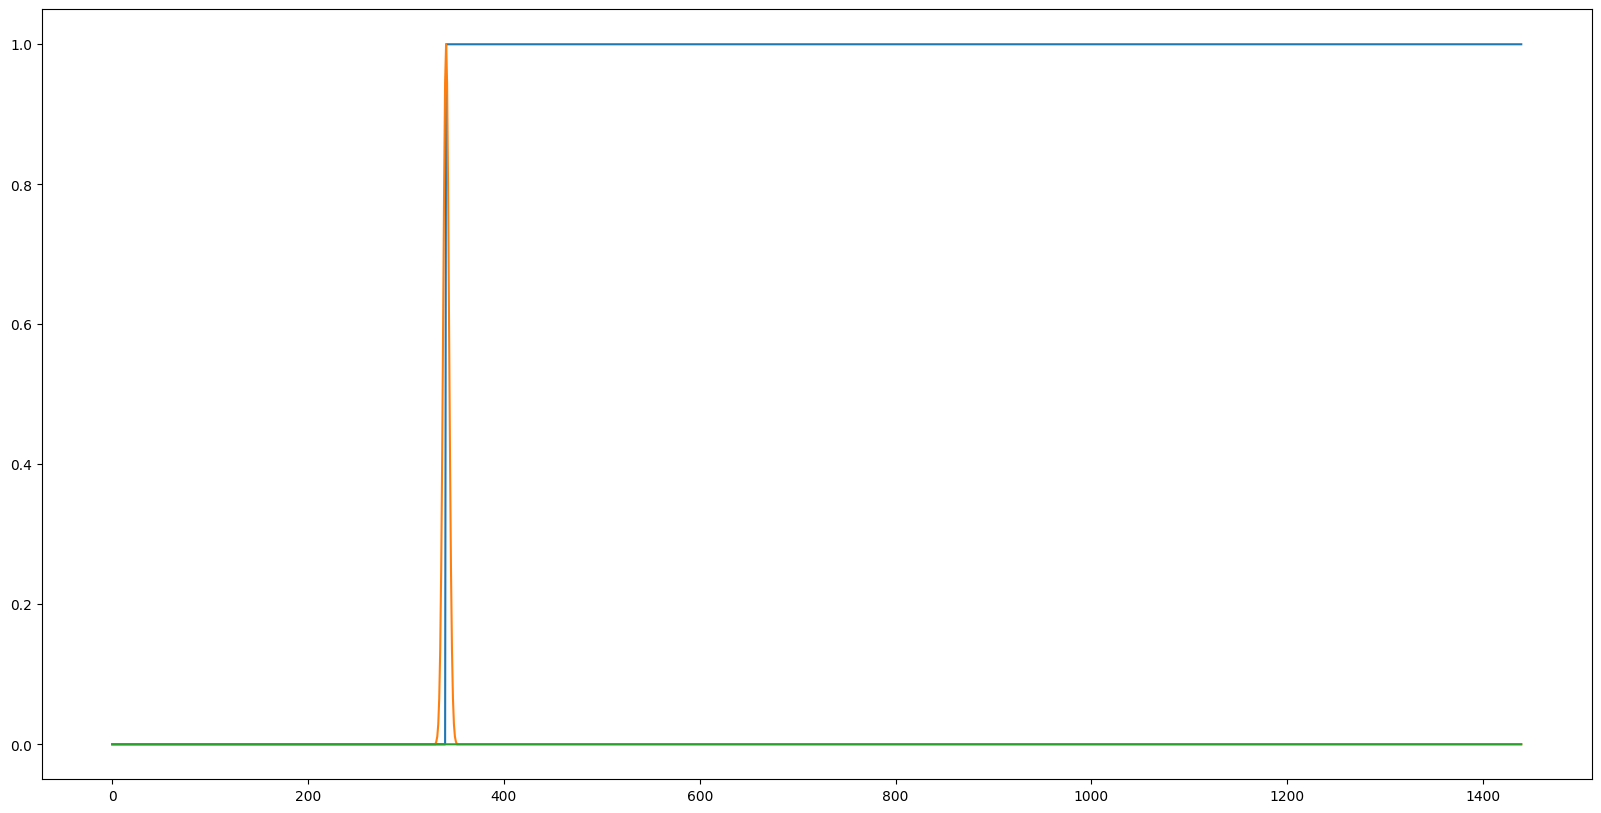

In [7]:
train_dl = datamodule.train_dataloader()
batch = next(iter(train_dl)) #dict_keys(['series_id', 'feature', 'label'])

idx = 0
s_id = batch['series_id'][idx]
x = batch['feature'][idx:idx+2]
y = batch['label'][idx]
fig = plt.figure(figsize=(20, 10))
# plt.plot(x[idx, 1, ::cfg.downsample_rate])
plt.plot(y)
plt.show()